# Figure 3, 4 & 5 - Volcano plots

In [1]:
# set correct working directory -> project folder
getwd()
setwd('..')
getwd()

[1] "/home/ptraxler/projects/bmdm-stim/workflow/notebooks"

[1] "/home/ptraxler/projects/bmdm-stim"

In [3]:
# for volcano plots
library(EnhancedVolcano, quietly=TRUE)
library(patchwork, quietly=TRUE)

Registered S3 methods overwritten by 'ggalt':
  method                  from   
  grid.draw.absoluteGrob  ggplot2
  grobHeight.absoluteGrob ggplot2
  grobWidth.absoluteGrob  ggplot2
  grobX.absoluteGrob      ggplot2
  grobY.absoluteGrob      ggplot2



In [38]:
# default plotting theme
macro_theme <- function(){
    
    # settings
    font <- "Arial"
    size <- 6 # 8
    
    theme_bw(
        base_size=size,
        base_family = font
    ) %+replace% 
    
    theme(
      #grid elements
#       panel.grid.major = element_blank(),    #strip major gridlines
#       panel.grid.minor = element_blank(),    #strip minor gridlines
#       axis.ticks = element_blank(),          #strip axis ticks
      
#       strips axis lines ?
      
      #text elements
        text = element_text(              
                   family = font,           
                   size = size),
        
      plot.title = element_text(             #title
                   family = font,            #set font family
                   size = size,                #set font size
                   face = 'bold',            #bold typeface
                   hjust = 0.5,                #center align
                   vjust = 2),               #raise slightly
      
      plot.subtitle = element_text(          #subtitle
                   family = font,            #font family
                   size = size),               #font size
      
      plot.caption = element_text(           #caption
                   family = font,            #font family
                   size = size,                 #font size
                   hjust = 0.5),               #center align
      
      axis.title = element_text(             #axis titles
                   family = font,            #font family
                   size = size),               #font size
      
      axis.text = element_text(              #axis text
                   family = font,            #axis famuly
                   size = size),                #font size
        
        legend.text = element_text(              #axis text
                   family = font,            #axis famuly
                   size = size), 
        
        legend.title = element_text(              #axis text
                   family = font,            #axis famuly
                   size = size),
      
#       axis.text.x = element_text(            #margin for axis text
#                     margin=margin(5, b = 10))
    )
}

In [5]:
# extended ggsave
ggsave_new <- function(filename, results_path, plot, width=5, height=5){
    for (format in c('svg','png')){ 
        ggsave(
          paste0(filename,'.',format),
          plot = plot,
          device = format,
          path = file.path(results_path),
          scale = 1,
          dpi = 300,
            width = width,
            height = height,
          limitsize = FALSE,
        )
    }
}

In [6]:
# general volcano proteins and genes
volcano_proteins <- c('CD115','CD11b','CD274','CD69','CD64','CD163','CD172a','CD14','CD80','Mac-2','CD95')
volcano_genes <- c('Csf1r','Itgam','Cd274','Cd69','Fcgr1','Cd163','Sirpa','Cd14','Cd80','Lgals3','Fas')

# Figure 3 -  INT - Untreated condition plot deviating genes

In [58]:
# config
data_path <- file.path('results','INT', 'DEA', "INT_DEA_untreated.csv")
results_path <- file.path('results','figures','figure_3')

# set colors for epigenetic correlation plots
correlation_colors <- c('RNA' = '#00FFFF',
                        'ATAC' = '#FF0000',
                        'correlated' = '#000000'
                       )

int_genes <- c()

LFC_filter <- 1
AveExpr_filter <- 1
adjp_filter <- 0.05

pCutoff <- adjp_filter
FCcutoff <- LFC_filter

top_n <- 10

width <- 4.5
height <- 4.5
options(repr.plot.width=width, repr.plot.height=height)

In [10]:
# load gene annotations
annot_genes <- read.csv(file=file.path('results','RNA','counts', "gene_annotation.tsv"), sep='\t', row.names=1)
dim(annot_genes)
head(annot_genes)

[1] 55487     8

,version,source,external_gene_name,external_gene_source,description,gene_biotype,length,gc
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>
ENSMUSG00000000194,13,ensembl_havana,Gpr107,MGI Symbol,G protein-coupled receptor 107 [Source:MGI Symbol;Acc:MGI:2139054],protein_coding,12766,0.4945950
ENSMUSG00000000247,11,ensembl_havana,Lhx2,MGI Symbol,LIM homeobox protein 2 [Source:MGI Symbol;Acc:MGI:96785],protein_coding,4393,0.5970863
ENSMUSG00000000544,14,ensembl_havana,Gpa33,MGI Symbol,glycoprotein A33 (transmembrane) [Source:MGI Symbol;Acc:MGI:1891703],protein_coding,2742,0.5309993
ENSMUSG00000000817,10,ensembl_havana,Fasl,MGI Symbol,"Fas ligand (TNF superfamily, member 6) [Source:MGI Symbol;Acc:MGI:99255]",protein_coding,1937,0.4305627
ENSMUSG00000000889,8,ensembl_havana,Dbh,MGI Symbol,dopamine beta hydroxylase [Source:MGI Symbol;Acc:MGI:94864],protein_coding,2692,0.5549777
ENSMUSG00000001138,13,ensembl_havana,Cnnm3,MGI Symbol,cyclin M3 [Source:MGI Symbol;Acc:MGI:2151055],protein_coding,6420,0.5610592


In [8]:
# load data of untreated condition
toptable <- read.csv(file=file.path(data_path), row.names=1)

dim(toptable)
head(toptable)

[1] 45069     9

,logFC,AveExpr,t,P.Value,adj.P.Val,B,time,treatment,group
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
ENSMUSG00000079362,-2.132968,-0.7122419,-13.35362,1.663390e-22,7.496731e-18,39.42716,0h,untreated,untreated_0h
ENSMUSG00000065397,-2.860914,-0.6913639,-12.78611,1.955200e-21,4.405946e-17,36.92592,0h,untreated,untreated_0h
ENSMUSG00000038332,-1.180553,4.6074257,-12.20429,2.539698e-20,3.742297e-16,35.68328,0h,untreated,untreated_0h
ENSMUSG00000106853,1.143991,-0.7383881,12.14388,3.321394e-20,3.742297e-16,34.44555,0h,untreated,untreated_0h
ENSMUSG00000038151,2.274013,4.9894830,12.04872,5.072609e-20,4.186277e-16,34.11652,0h,untreated,untreated_0h
ENSMUSG00000095574,-1.919970,-0.6882451,-12.02760,5.573157e-20,4.186277e-16,33.99578,0h,untreated,untreated_0h


In [117]:
# find top_n genes by LFC
rna_surplus <- rownames(toptable)[(toptable$logFC < -LFC_filter)&(toptable$adj.P.Val<adjp_filter)&(toptable$AveExpr>AveExpr_filter)]
atac_potential <- rownames(toptable)[(toptable$logFC > LFC_filter)&(toptable$adj.P.Val<adjp_filter)&(toptable$AveExpr>AveExpr_filter)]

top_genes <- union(
    rownames(toptable[rna_surplus,])[order(toptable[rna_surplus,'logFC'])[1:top_n]],
    rownames(toptable[atac_potential,])[order(toptable[atac_potential,'logFC'], decreasing = TRUE)[1:top_n]]
)

top_genes <- top_genes[!grepl("*.Rik|Gm.*",annot_genes[top_genes,'external_gene_name'])]

length(top_genes)
top_genes

[1] 16

[1] "ENSMUSG00000037846" "ENSMUSG00000044626" "ENSMUSG00000016495"
 [4] "ENSMUSG00000040877" "ENSMUSG00000026069" "ENSMUSG00000060314"
 [7] "ENSMUSG00000039958" "ENSMUSG00000027347" "ENSMUSG00000028654"
[10] "ENSMUSG00000057346" "ENSMUSG00000060183" "ENSMUSG00000045777"
[13] "ENSMUSG00000040276" "ENSMUSG00000038151" "ENSMUSG00000029379"
[16] "ENSMUSG00000029417"

In [118]:
annot_genes[top_genes,'external_gene_name']

[1] "Rtkn2"   "Liph"    "Plgrkt"  "Wdr25"   "Il1rl1"  "Zfp941"  "Etfbkmt"
 [8] "Rasgrp1" "Mycl"    "Apol9a"  "Cxcl11"  "Ifitm10" "Pacsin1" "Prdm1"  
[15] "Cxcl3"   "Cxcl9"

In [119]:
# annotate with gene name
toptable$label <- NA
toptable[top_genes, 'label'] <- annot_genes[top_genes, 'external_gene_name']

In [137]:
# different color scheme
keyvals <- ifelse(
    ((toptable$logFC < -LFC_filter)&(toptable$adj.P.Val<adjp_filter)&(toptable$AveExpr>AveExpr_filter)), correlation_colors[['RNA']],
      ifelse(((toptable$logFC > LFC_filter)&(toptable$adj.P.Val<adjp_filter)&(toptable$AveExpr>AveExpr_filter)), correlation_colors[['ATAC']],
        'grey'))

keyvals[is.na(keyvals)] <- 'grey'

names(keyvals)[keyvals == correlation_colors[['RNA']]] <- 'Transcriptional surplus'
names(keyvals)[keyvals == correlation_colors[['ATAC']]] <- 'Epigenetic potential'
names(keyvals)[keyvals == 'grey'] <- 'Correlated'

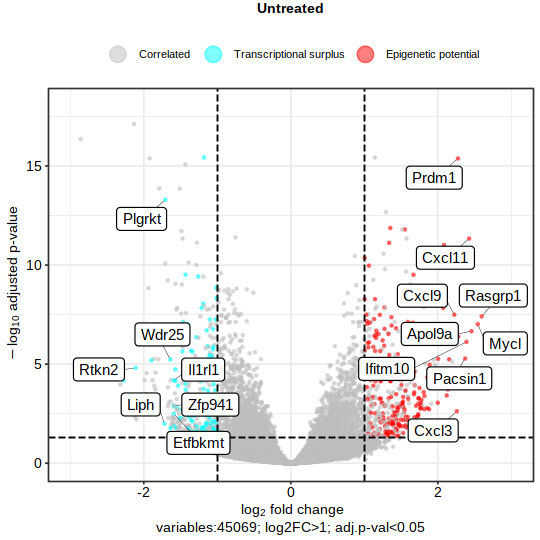

In [140]:
# volcano plot of untreated condition

lab <- toptable$label
x <- "logFC"
y <- "adj.P.Val"

ut_volcanos <- EnhancedVolcano(toptable = toptable,
                lab = lab,
                x = x,
                y = y,
                selectLab = NULL,
                xlim = c(-3,3), #c(min(toptable[[x]], na.rm = TRUE) - 1, max(toptable[[x]], na.rm = TRUE) + 1),
                ylim = c(0,18), #, max(-log10(toptable[[y]]), na.rm = TRUE) + 5),
                xlab = bquote(~log[2] ~ "fold change"),
                ylab = bquote(~-log[10] ~ "adjusted p-value"),
                axisLabSize = 12,
                title = 'Untreated',
                subtitle = '',
                caption = paste0("variables:",nrow(toptable),"; log2FC>",FCcutoff,"; adj.p-val<",pCutoff),
                titleLabSize = 14,
                subtitleLabSize = 0,
                captionLabSize = 6,
                pCutoff = pCutoff, #default: 0.05
                pCutoffCol = y,
                FCcutoff = FCcutoff, # default:1
                cutoffLineType = "longdash",
                cutoffLineCol = "black",
                cutoffLineWidth = 0.4,
                pointSize = 0.25, # default: 2
                labSize = 3, #default: 5
                labCol = "black",
                labFace = "plain",
                boxedLabels = TRUE, #default: FALSE
                parseLabels = FALSE,
                shape = 19,
                shapeCustom = NULL,
                col = c("grey30", "forestgreen", "royalblue", "red2"),
                colCustom = keyvals,
                colAlpha = 1/2,
                colGradient = NULL,
                colGradientBreaks = c(pCutoff, 1),
                colGradientLabels = c("0", "1.0"),
                colGradientLimits = c(0, 1),
                legendLabels = c("NS", expression(log[2] ~ FC), "adj. p-value", 'both'),
                legendPosition = "right", #default: "top"
                legendLabSize = 14,
                legendIconSize = 4,
                legendDropLevels = TRUE,
                encircle = NULL,
                encircleCol = "black",
                encircleFill = "pink",
                encircleAlpha = 3/4,
                encircleSize = 2.5,
                shade = NULL,
                shadeFill = "grey",
                shadeAlpha = 1/2,
                shadeSize = 0.01,
                shadeBins = 2,
                drawConnectors = TRUE, #default: FALSE
                widthConnectors = 0.1, # default: 0.5
                typeConnectors = "closed",
                endsConnectors = "first",
                lengthConnectors = unit(0.01, "npc"),
                colConnectors = "grey10",
                max.overlaps = 0,
                maxoverlapsConnectors = 10, # default: NULL
                min.segment.length = 0,
                directionConnectors = "both",
                arrowheads = FALSE, # default: TRUE
                hline = NULL,
                hlineType = "longdash",
                hlineCol = "black",
                hlineWidth = 0.4,
                vline = NULL,
                vlineType = "longdash",
                vlineCol = "black",
                vlineWidth = 0.4,
                gridlines.major = TRUE,
                gridlines.minor = TRUE,
                border = "partial",
                borderWidth = 0.8,
                borderColour = "black",
                raster = FALSE
               ) + 
# annotate(x=2.15, y = 18, label="Epigenetic potential", geom="text", hjust=0.5, size=3) +
# annotate(x=-2.15, y = 18, label="Transcriptional surplus", geom="text", hjust=0.5, size=3) +
# annotate(x=0, y = 18, label="Correlated", geom="text", hjust=0.5, size=3) +
macro_theme() + 
theme(legend.title = element_blank(), legend.position = "top", legend.direction = "horizontal")
#+ guides(color = "none") 
# legend.position = c(0.5, 0.1), 

ut_volcanos

In [141]:
# save plot
set.seed(42)
ggsave_new(filename="INT_untreated_volcano",
           results_path=results_path,
           plot=ut_volcanos,
           width=width,
           height=height
          )

# Figure 4 -  Spi1 vs NT Volcano plot in homeostasis (=untreated)

In [11]:
# configs
data_path <- file.path('results','KO15')
results_path <- file.path('results','figures','figure_4')

# Spi1 volcano plot
spi1_volcano_proteins <- unlist(strsplit('CD115 | CD64 | Mac-2 | CD14', ' \\| '))
spi1_volcano_genes <- unlist(strsplit('Ptgds | Csf1r | Fcgr1 | Lgals3 | Cd14 | Cd74 | Cybb | Ly86 | Tyrobp | H2-Q6 | H2-K1 | Rpl24 | Id3 | Spp1 | Ctsl | H2-D1 | Akr1b3 | Lyz2', ' \\| '))

set.seed(42)

In [41]:
width <- 2 # 6
height <- 2.5 # 5
options(repr.plot.width=width, repr.plot.height=height)

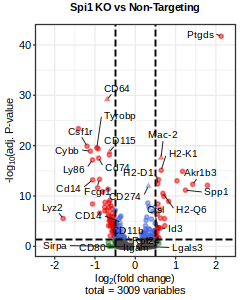

In [42]:
# config
cond <- 'untreated'
KO_gene <- 'mSpi1'
        
RNA <- read.csv(file=file.path(data_path, 'DEA_condition',paste0('KO15_DEA_RNA_',cond,'_',KO_gene,'.csv')), row.names=1)

AB <- read.csv(file=file.path(data_path,'DEA_condition', paste0('KO15_DEA_AB_',cond,'_',KO_gene,'.csv')), row.names=1)

res <- rbind(RNA, AB)

keyvals.shape <- ifelse(rownames(res)%in%rownames(AB), 17, 20)
names(keyvals.shape)[keyvals.shape == 17]<-"AB"
names(keyvals.shape)[keyvals.shape == 20]<-"RNA"

set.seed(42)

spi1_volcano_p <- EnhancedVolcano(
    res,
    lab = rownames(res),
    selectLab = unique(c(spi1_volcano_genes, spi1_volcano_proteins, volcano_genes, volcano_proteins)),
#     boxedLabels = TRUE,
    # connector config start
    drawConnectors = TRUE,
    widthConnectors = 0.2,
    colConnectors = "grey10",
    max.overlaps = 0,
    maxoverlapsConnectors = Inf,
    min.segment.length = 0,
    directionConnectors = "both",
    arrowheads = FALSE,
    # connector config end
    x = 'avg_log2FC',
    y = 'p_val_adj',
    title = 'Spi1 KO vs Non-Targeting',
    subtitle = '',
    xlab=expression('log'[2]*'(fold change)'),
    ylab=expression('-log'[10]*'(adj. P-value)'),
    axisLabSize = 6, # 12
    xlim = c(-2.25,2.25),
    ylim = c(0,42),
    titleLabSize = 6, #14
    subtitleLabSize = 0,
#     captionLabSize = 6, # 8
#     legendLabels=c('NS','avg.log2FC','adj.p-value', 'both'),
    pCutoff = 0.05,
    FCcutoff = 0.5,
    pointSize = 1,
    labSize = 2.1, # 3
    colAlpha = 0.5,
    shapeCustom = keyvals.shape,
    legendPosition = 'none', #top, right, left, none #right
#     caption = bquote("cutoffs avg." ~log[2]~ "fold change > 0.5; adj.p-value < 0.05"),
) + macro_theme() + 
theme(legend.position="none")

spi1_volcano_p 

In [43]:
# save plot
set.seed(42)
ggsave_new(filename="spi1_volcano_untreated",
           results_path=results_path,
           plot=spi1_volcano_p,
           width=width,
           height=height
          )

# Figure 5 - Volcano plots for interesting edges ie KO pairs

In [7]:
# config
data_path <- file.path('results','KO150', 'KO_classifier', 'all', 'interpretation')
results_path <- file.path('results','figures','figure_5')
top_n <- 250

pairs <- list(
#     list('KO_1'='LO28-24h+Ifnar1','KO_2'='LO28-24h+Irf9', 'mode'='stat'),
#     list('KO_1'='LO28-6h+Ddx21','KO_2'='LO28-6h+Dnttip2', 'mode'='stat'),
    list('KO_1'='LO28-6h+Med14','KO_2'='LO28-6h+Med8', 'mode'='stat'),
#     list('KO_1'='LO28-6h+Sfpq','KO_2'='untreated+Sfpq', 'mode'='stat'),
    list('KO_1'='untreated+Ep300','KO_2'='untreated+Sfpq', 'mode'='stat'),
    list('KO_1'='LO28-6h+Ep300','KO_2'='LO28-6h+Sfpq', 'mode'='stat'),
    list('KO_1'='LO28-6h+Myd88','KO_2'='LO28-6h+Smc1a', 'mode'='stat')
)

In [16]:
width <- 4 # 6
height <- 2.6 # 4
options(repr.plot.width=width, repr.plot.height=height)

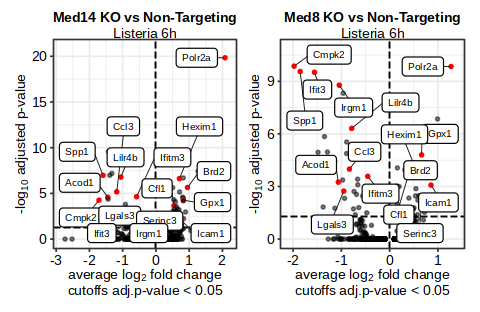

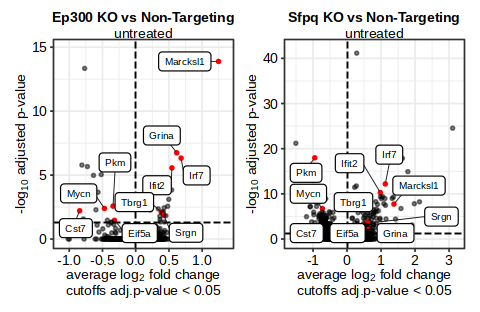

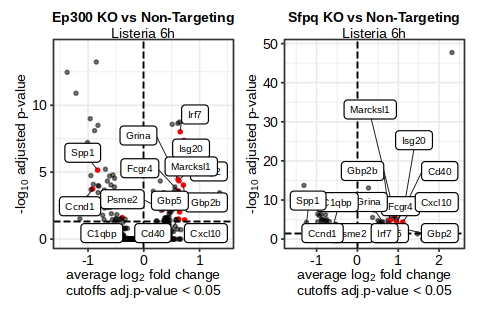

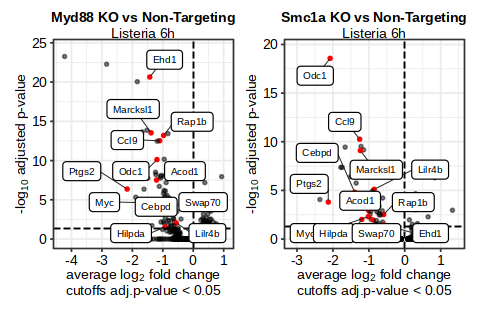

In [17]:
for (pair in pairs) {

    # load overlap information
    if (pair[['mode']]=='stat'){
        tmp_overlaps <- read.csv(file.path(data_path, 'overlaps', paste0(pair[['KO_1']],"-",pair[['KO_2']],"_stat",".csv")))
    }else{
        tmp_overlaps <- read.csv(file.path(data_path, 'overlaps', paste0(pair[['KO_1']],"-",pair[['KO_2']],"_top",top_n,".csv")))
    }

    overlaps <- tmp_overlaps[[1]]
#     head(overlaps)

    volcano_all <- list()

    for (KO_n in c('KO_1','KO_2')){

#         print(sim[i,KO_n])

        cond <- strsplit(pair[[KO_n]],'\\+')[[1]][1]
        KO_gene <- strsplit(pair[[KO_n]],'\\+')[[1]][2]

        # load DEA results
        res <- read.csv(file=file.path('results','KO150', 'DEA_condition_mixscape',paste0('KO150_DEA_RNA_',cond,'_',KO_gene,'.csv')), row.names=1)

        keyvals.alpha <- ifelse(rownames(res)%in%overlaps, 1, 0.5)
        names(keyvals.alpha)[keyvals.alpha == 1]<-"overlap"
        names(keyvals.alpha)[keyvals.alpha == 0.1]<-"no-overlap"

        keyvals.colour <- ifelse(rownames(res)%in%overlaps, 'red', 'black')
        names(keyvals.colour)[keyvals.colour == 'red']<-"overlap"
        names(keyvals.colour)[keyvals.colour == 'black']<-"no-overlap"

        labels <- rownames(res)
        labels[!(labels%in%overlaps)] <- ''

        tmp_volcano <- EnhancedVolcano(
            res,
            lab = rownames(res),#labels,
            selectLab = overlaps,
            boxedLabels = TRUE,
            # connector config start
            drawConnectors = TRUE,
            widthConnectors = 0.2,
            colConnectors = "grey10",
            max.overlaps = 0,
            maxoverlapsConnectors = 20,
            min.segment.length = 0,
            directionConnectors = "both",
            arrowheads = FALSE,
            # connector config end
            x = 'avg_log2FC',
            y = 'p_val_adj',
            title = paste0(KO_gene,' KO vs Non-Targeting'),
            subtitle = gsub(pattern = 'LO28-', replacement = "Listeria ", x = cond), #paste0(cond),
            xlab=expression('average log'[2]*' fold change'),
            ylab=expression('-log'[10]*' adjusted p-value'),
            xlim = c(min(res[['avg_log2FC']], na.rm = TRUE) - 0.1, max(res[['avg_log2FC']], na.rm = TRUE) + 0.1),
            ylim = c(0, max(-log10(res[['p_val_adj']]), na.rm = TRUE) + 1),
            axisLabSize = 8,
            titleLabSize = 10,
            subtitleLabSize = 10,
            captionLabSize = 8, 
            pointSize = 0.5,
            labSize = 2.0, # 3.0
            legendLabels=c('NS','avg.log2FC','adj.p-value', 'both'),
            pCutoff = 0.05,
            FCcutoff = 0,
            colCustom = keyvals.colour,
            colAlpha = keyvals.alpha,#0.5,
        #     shapeCustom = keyvals.shape,
            legendPosition = 'right', #top, right, left, none
            caption = bquote("cutoffs adj.p-value < 0.05"),
            legendLabSize = 8,
            legendIconSize = 1,
        ) + macro_theme()

    #     print(tmp_volcano)

        volcano_all[[KO_n]] <- tmp_volcano+guides(shape = "none", color="none")
        
#         if (length(volcano_all)==0){
#             volcano_all[[KO_n]] <- tmp_volcano+guides(shape = "none", color="none")
#         }else{
#             volcano_all[[KO_n]] <- tmp_volcano
#         }
    }

    volcano_all_p <- wrap_plots(volcano_all, ncol = 2)
        print(volcano_all_p)

    # save volcano plot
    set.seed(42)
    ggsave_new(filename=paste0(pair[['KO_1']],"-",pair[['KO_2']],"_",pair[['mode']],"_volcano"),
           results_path=results_path,
           plot=volcano_all_p,
           width=width,
           height=height
          )
}